### Importação dos dados



In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head(10)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
5,Blocos de montar,brinquedos,32.26,0.000000,03/12/2020,Beatriz Moraes,RS,5,cupom,1,-30.17,-53.50
6,Boneca bebê,brinquedos,58.90,0.000000,07/08/2021,João Souza,SP,3,boleto,1,-22.19,-48.79
7,Lava louças,eletrodomesticos,1586.23,84.993080,18/06/2021,Felipe Santos,CE,5,cartao_credito,10,-5.20,-39.53
8,Lavadora de roupas,eletrodomesticos,2024.31,105.372857,08/01/2022,Thiago Silva,SP,1,cartao_credito,5,-22.19,-48.79
9,Carrinho controle remoto,brinquedos,100.26,6.737659,24/02/2020,Beatriz Moraes,SP,5,boleto,1,-22.19,-48.79


#1. Análise do faturamento



In [47]:
#Adicionando a coluna Faturamento
loja['Faturamento'] = loja['Preço'] + loja['Frete']
loja2['Faturamento'] = loja2['Preço'] + loja2['Frete']
loja3['Faturamento'] = loja3['Preço'] + loja3['Frete']
loja4['Faturamento'] = loja4['Preço'] + loja4['Frete']

faturamento = loja['Faturamento'].sum()
faturamento2 = loja2['Faturamento'].sum()
faturamento3 = loja3['Faturamento'].sum()
faturamento4 = loja4['Faturamento'].sum()

print(f'Faturamento loja 1: {faturamento}')
print(f'Faturamento loja 2: {faturamento2}')
print(f'Faturamento loja 3: {faturamento3}')
print(f'Faturamento loja 4: {faturamento4}')


Faturamento loja 1: 1616347.0877956916
Faturamento loja 2: 1567773.218012645
Faturamento loja 3: 1542047.691222643
Faturamento loja 4: 1458253.455118983


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar DataFrame com os dados do faturamento
faturamentos = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [faturamento, faturamento2, faturamento3, faturamento4]
})
faturamentos.head(4)


,Loja,Faturamento
0,Loja 1,1.616347e+06
1,Loja 2,1.567773e+06
2,Loja 3,1.542048e+06
3,Loja 4,1.458253e+06


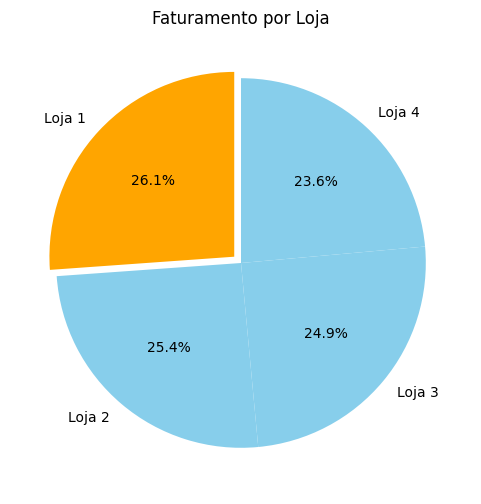

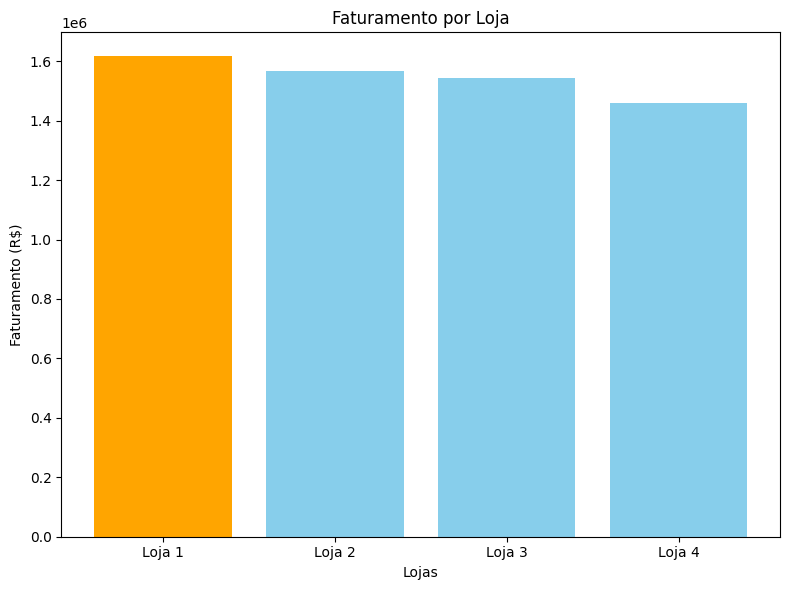

In [49]:
# Identificar maior faturamento
maior_valor = faturamentos['Faturamento'].max()
cores = ['orange' if v == maior_valor else 'skyblue' for v in faturamentos['Faturamento']]
explode = [0.05 if v == maior_valor else 0 for v in faturamentos['Faturamento']]

# --- Gráfico de Pizza ---
plt.figure(figsize=(6, 6))
plt.pie(faturamentos['Faturamento'], labels=faturamentos['Loja'], autopct='%1.1f%%',
        startangle=90, colors=cores, explode=explode)
plt.title('Faturamento por Loja')
plt.show()
print()

# --- Gráfico de Barras ---
plt.figure(figsize=(8, 6))
plt.bar(faturamentos['Loja'], faturamentos['Faturamento'], color=cores)
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria

In [50]:
#Adicionando coluna loja
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Criando o data frame lojas
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
lojas.head(10)
lojas.query('Loja == "Loja 2"').head(10)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Faturamento,Loja
2359,Cadeira de escritório,moveis,378.20,20.421138,04/08/2021,Thiago Silva,MG,1,boleto,1,-18.10,-44.38,398.621138,Loja 2
2360,Pandeiro,instrumentos musicais,102.37,3.035334,26/11/2020,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66,105.405334,Loja 2
2361,Cama king,moveis,591.13,31.759020,22/10/2021,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95,622.889020,Loja 2
2362,Cama king,moveis,1208.24,61.919584,04/05/2022,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50,1270.159584,Loja 2
2363,Cadeira de escritório,moveis,530.41,25.827176,26/02/2022,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79,556.237176,Loja 2
2364,Violão,instrumentos musicais,397.84,21.466909,10/09/2021,Beatriz Moraes,MT,5,cartao_credito,3,-12.64,-55.42,419.306909,Loja 2
2365,Mochila,esporte e lazer,141.24,12.000644,10/06/2020,Bianca Santos,SP,1,cupom,1,-22.19,-48.79,153.240644,Loja 2
2366,Tablet ABXY,eletronicos,1283.53,65.928550,12/04/2022,Juliana Costa,RJ,4,boleto,1,-22.25,-42.66,1349.458550,Loja 2
2367,Panela de pressão,utilidades domesticas,110.40,6.409572,11/04/2022,Thiago Silva,BA,5,boleto,1,-13.29,-41.71,116.809572,Loja 2
2368,Cubo mágico 8x8,brinquedos,12.09,5.123795,04/09/2021,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,17.213795,Loja 2


In [51]:
#Criando função
import pandas as pd
import matplotlib.pyplot as plt

def categorias_populares_por_loja(nomeloja):
  #Função para mostrar as categorias mais populares

  # Filtra os dados para a loja especificada
  loja_df = lojas[lojas['Loja'] == nomeloja]

  # Agrupa por categoria e conta o número de produtos vendidos
  categoria_contagem = loja_df.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')

  # Ordena pela quantidade de vendas
  categoria_contagem = categoria_contagem.sort_values(by='Quantidade de Vendas', ascending=False)

  # Cria o gráfico de barras com matplotlib
  plt.figure(figsize=(10, 6))
  plt.bar(categoria_contagem['Categoria do Produto'], categoria_contagem['Quantidade de Vendas'], color='skyblue')
  plt.title(f"Categorias mais populares na {nomeloja}")
  plt.xlabel("Categoria do Produto")
  plt.ylabel("Quantidade de Vendas")
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.savefig("categorias_populares_matplotlib.png")  # Salva o gráfico como imagem

  # Retorna o DataFrame com os dados
  print('-----------------')
  print(f'Loja: {nomeloja}')
  print('-----------------')
  print(categoria_contagem)
  #return categoria_contagem

-----------------
Loja: Loja 1
-----------------
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   465
2            eletronicos                   448
0             brinquedos                   324
1       eletrodomesticos                   312
3        esporte e lazer                   284
4  instrumentos musicais                   182
5                 livros                   173
7  utilidades domesticas                   171
-----------------
Loja: Loja 2
-----------------
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   442
2            eletronicos                   422
0             brinquedos                   313
1       eletrodomesticos                   305
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
7  utilidades domesticas                   181
-----------------
Loja: Loja 3
-----------------
    Cat

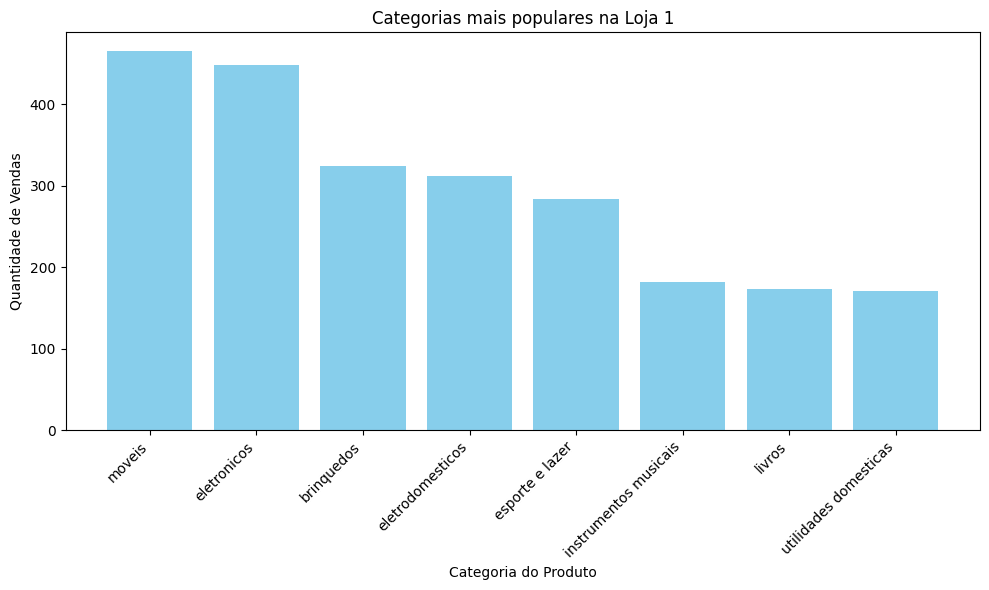

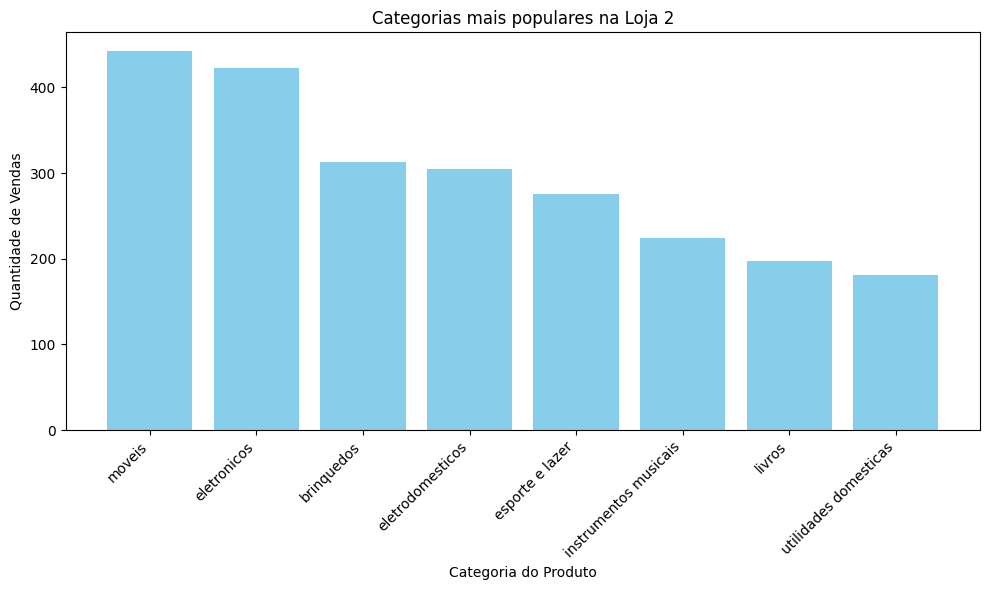

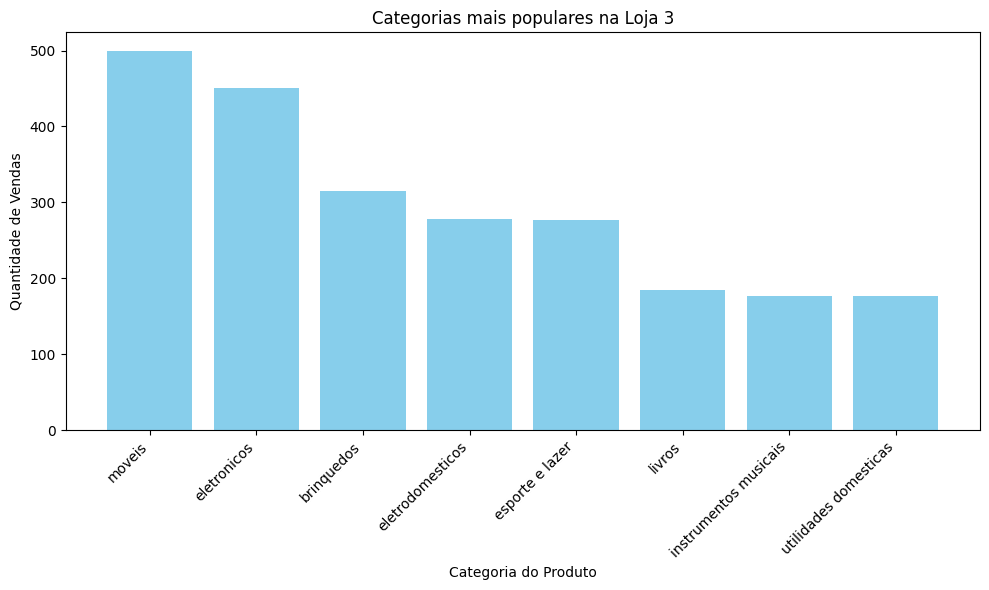

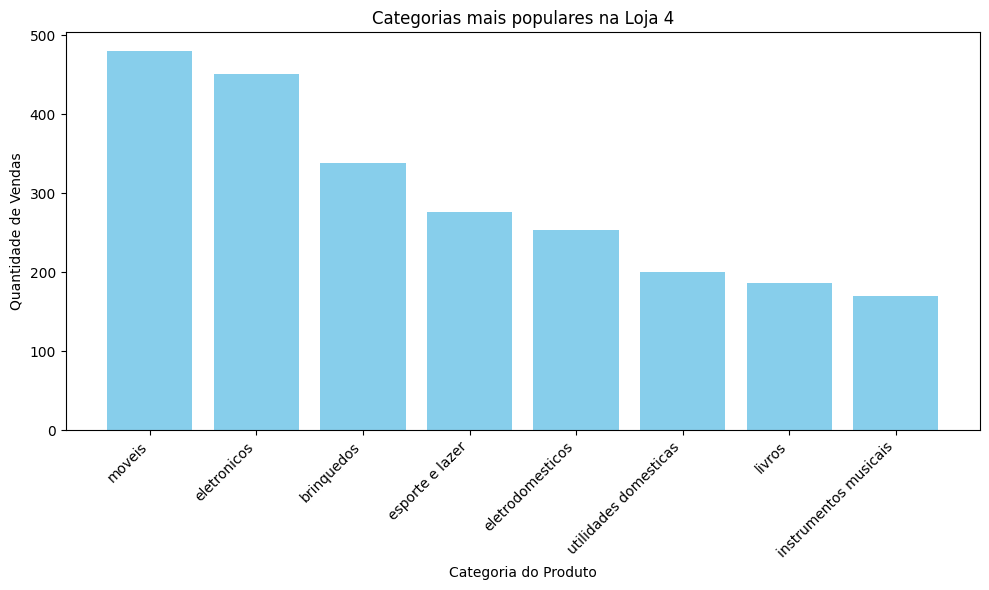

In [52]:

categorias_populares_por_loja('Loja 1')
categorias_populares_por_loja('Loja 2')
categorias_populares_por_loja('Loja 3')
categorias_populares_por_loja('Loja 4')

# 3. Média de Avaliação das Lojas


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def media_avaliacao_por_loja(df):
    # Agrupar por loja e calcular a média da avaliação
    medias = df.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)

    # Imprimir as médias
    print("Média de Avaliação da compra por Loja:")
    print(medias)

    # Gerar gráfico de barras
    plt.figure(figsize=(10, 6))
    medias.plot(kind='bar', color='skyblue')
    plt.title('Média de Avaliação da compra por Loja')
    plt.xlabel('Loja')
    plt.ylabel('Média de Avaliação')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('grafico_media_avaliacao_loja.png')
    plt.show()


Média de Avaliação da compra por Loja:
Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64


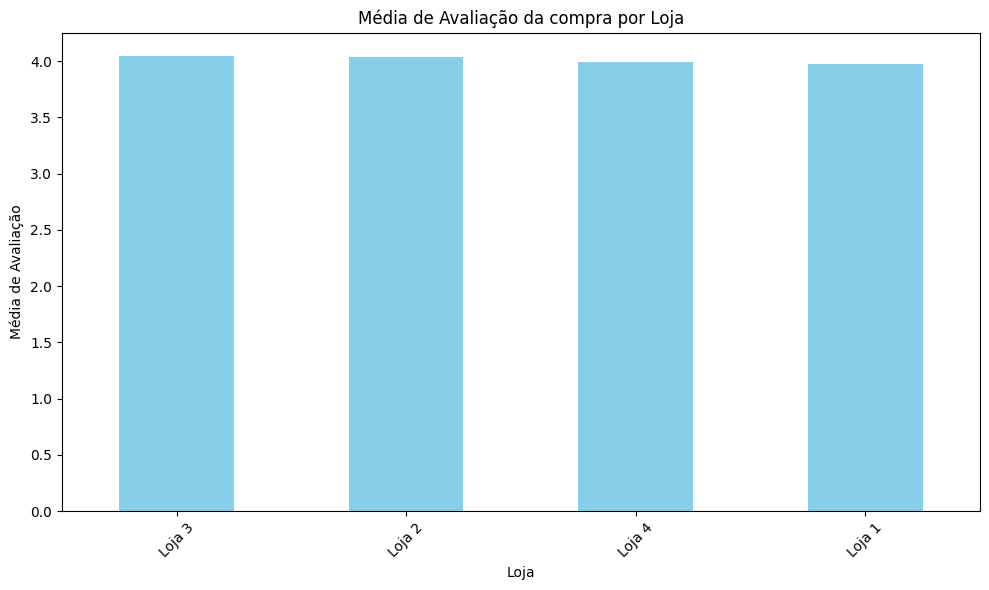

In [54]:
media_avaliacao_por_loja(lojas)


# 4. Produtos Mais e Menos Vendidos

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

def produtos_mais_menos_vendidos(lojas, nomeloja):
  # Filtrar o DataFrame pela loja especificada
  loja_df = lojas[lojas['Loja'] == nomeloja]

  # Agrupar por produto e somar as vendas (usando 'Quantidade de parcelas' como proxy de vendas)
  #vendas_por_produto = loja_df.groupby('Produto')['Quantidade de parcelas'].sum()
  vendas_por_produto = loja_df.groupby('Produto').size().reset_index(name='Quantidade de Vendas')

  # Identificar os 10 mais e os 10 menos vendidos
  mais_vendidos = vendas_por_produto.sort_values(by='Quantidade de Vendas', ascending=False).head(10)
  menos_vendidos = vendas_por_produto.sort_values(by='Quantidade de Vendas', ascending=True).head(10)

  # Impressão dos resultados
  print(f"\n{'='*50}\nLOJA: {nomeloja.upper()}\n{'='*50}")
  print("\nProdutos que foram os mais vendidos:")
  print(mais_vendidos)

  print("\nProdutos que foram os menos vendidos:")
  print(menos_vendidos)

  # Gráfico dos mais vendidos
  plt.figure(figsize=(10, 6))
  mais_vendidos.plot(kind='bar', color='green')
  plt.title(f'Produtos mais vendidos na {nomeloja}')
  plt.xlabel('Produto')
  plt.ylabel('Quantidade de Vendas')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig('produtos_mais_vendidos.png')
  plt.show()

  # Gráfico dos menos vendidos
  plt.figure(figsize=(10, 6))
  menos_vendidos.plot(kind='bar', color='red')
  plt.title(f'Produtos menos vendidos na {nomeloja}')
  plt.xlabel('Produto')
  plt.ylabel('Quantidade de Vendas')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig('produtos_menos_vendidos.png')
  plt.show()


LOJA: LOJA 1

Produtos que foram os mais vendidos:
               Produto  Quantidade de Vendas
47       TV Led UHD 4K                    60
37         Micro-ondas                    60
24       Guarda roupas                    60
43  Secadora de roupas                    58
3     Blocos de montar                    56
17              Cômoda                    56
4     Bola de basquete                    55
2            Bicicleta                    54
14        Copo térmico                    54
23           Geladeira                    54

Produtos que foram os menos vendidos:
                        Produto  Quantidade de Vendas
11                 Celular ABXY                    33
26                      Headset                    33
41            Panela de pressão                    35
40                     Pandeiro                    36
13  Ciência de dados com python                    39
38                      Mochila                    39
15               Corda de pular     

<Figure size 1000x600 with 0 Axes>

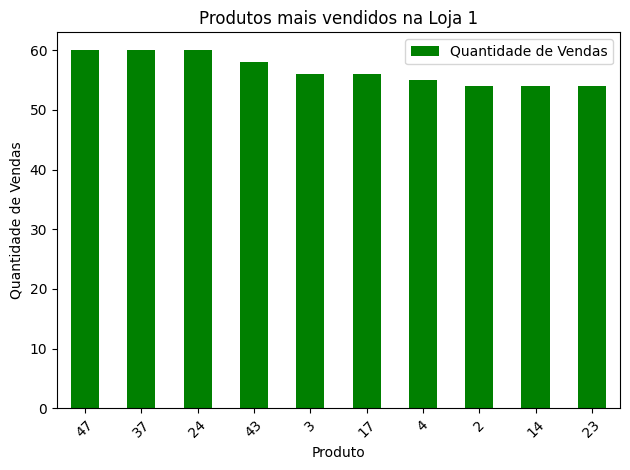

<Figure size 1000x600 with 0 Axes>

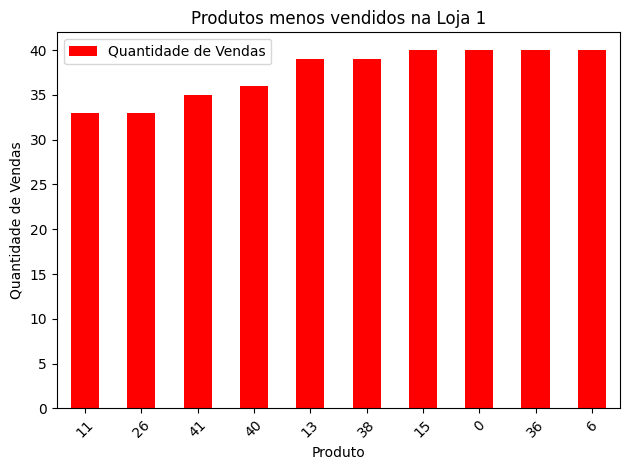


LOJA: LOJA 2

Produtos que foram os mais vendidos:
                     Produto  Quantidade de Vendas
28  Iniciando em programação                    65
37               Micro-ondas                    62
1                    Bateria                    61
49                    Violão                    58
40                  Pandeiro                    58
43        Secadora de roupas                    57
12          Celular Plus X42                    55
24             Guarda roupas                    54
3           Blocos de montar                    54
30           Jogo de panelas                    52

Produtos que foram os menos vendidos:
               Produto  Quantidade de Vendas
31   Jogo de tabuleiro                    32
27          Impressora                    34
36      Mesa de jantar                    34
42            Poltrona                    35
22      Fone de ouvido                    37
0   Assistente virtual                    38
20            Faqueiro           

<Figure size 1000x600 with 0 Axes>

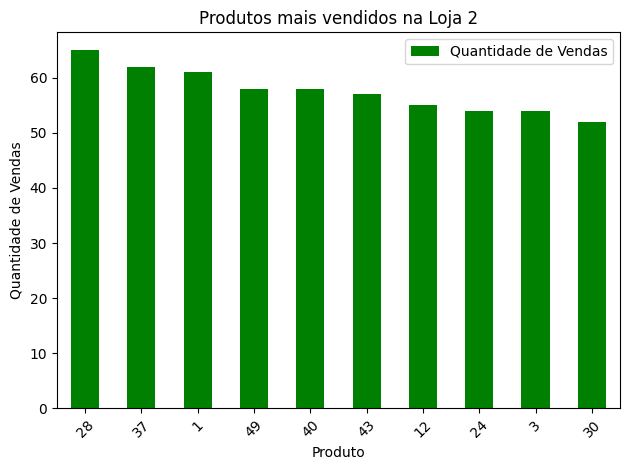

<Figure size 1000x600 with 0 Axes>

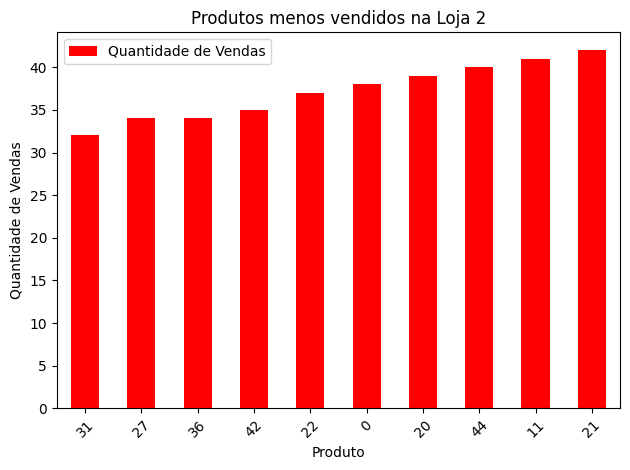


LOJA: LOJA 3

Produtos que foram os mais vendidos:
                Produto  Quantidade de Vendas
32        Kit banquetas                    57
36       Mesa de jantar                    56
9             Cama king                    56
17               Cômoda                    55
30      Jogo de panelas                    55
44             Smart TV                    54
21                Fogão                    53
39  Modelagem preditiva                    53
15       Corda de pular                    53
2             Bicicleta                    52

Produtos que foram os menos vendidos:
               Produto  Quantidade de Vendas
3     Blocos de montar                    35
29       Jogo de copos                    36
37         Micro-ondas                    36
38             Mochila                    36
25            Guitarra                    38
14        Copo térmico                    38
26             Headset                    39
20            Faqueiro                    3

<Figure size 1000x600 with 0 Axes>

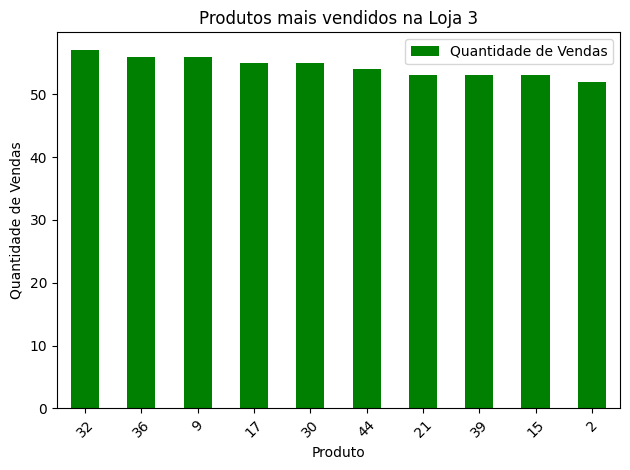

<Figure size 1000x600 with 0 Axes>

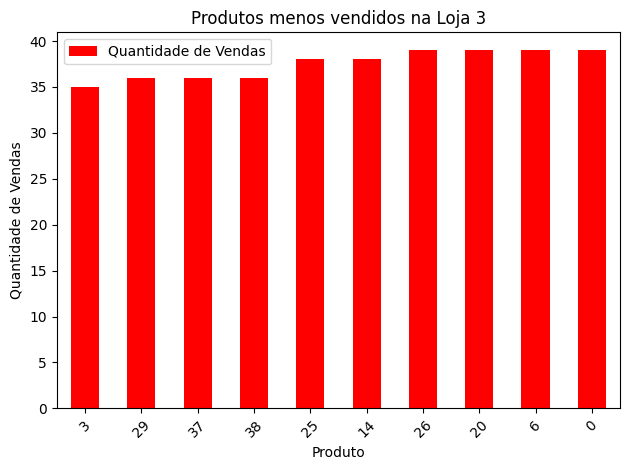


LOJA: LOJA 4

Produtos que foram os mais vendidos:
                     Produto  Quantidade de Vendas
8                   Cama box                    62
20                  Faqueiro                    59
9                  Cama king                    56
18   Dashboards com Power BI                    56
17                    Cômoda                    55
36            Mesa de jantar                    55
10  Carrinho controle remoto                    55
3           Blocos de montar                    54
44                  Smart TV                    54
40                  Pandeiro                    52

Produtos que foram os menos vendidos:
                        Produto  Quantidade de Vendas
25                     Guitarra                    33
24                Guarda roupas                    34
49                       Violão                    37
13  Ciência de dados com python                    38
34           Lavadora de roupas                    38
23                    Ge

<Figure size 1000x600 with 0 Axes>

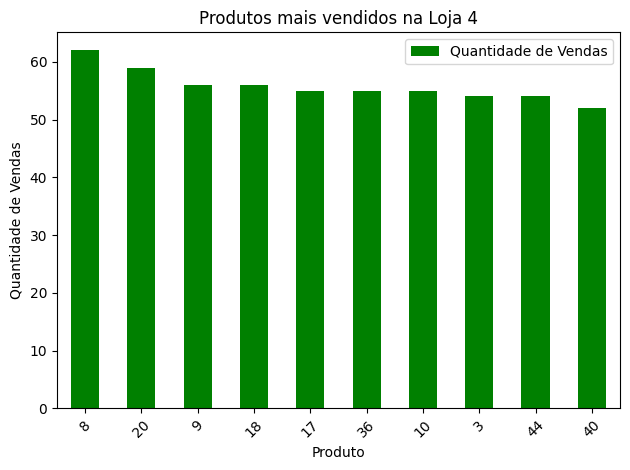

<Figure size 1000x600 with 0 Axes>

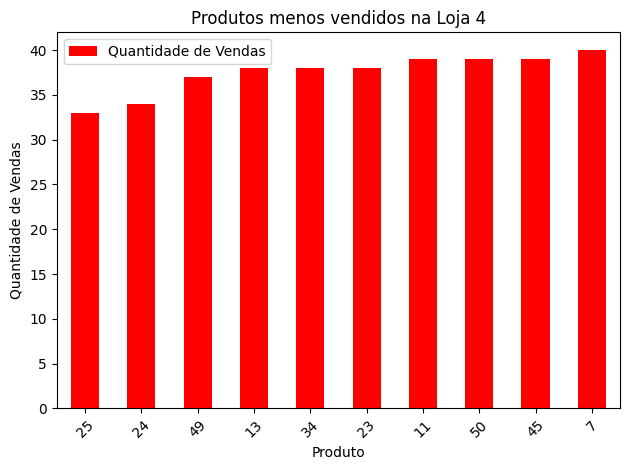

In [56]:
produtos_mais_menos_vendidos(lojas, 'Loja 1')
produtos_mais_menos_vendidos(lojas, 'Loja 2')
produtos_mais_menos_vendidos(lojas, 'Loja 3')
produtos_mais_menos_vendidos(lojas, 'Loja 4')

# 5. Frete Médio por Loja

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

def custo_medio_frete_por_loja():
  # Calcular o custo médio do frete por loja
  custo_medio = lojas.groupby('Loja')['Frete'].mean().sort_values(ascending=True)
  df_custo_medio = custo_medio.reset_index()
  df_custo_medio.columns = ['Loja', 'Custo Médio do Frete']

  # Imprimir os resultados
  print("\n" + "="*50)
  print("Custo médio do frete nas lojas")
  print("="*50)
  print(df_custo_medio)

  # Gráfico de pizza
  plt.figure(figsize=(8, 8))
  plt.pie(df_custo_medio['Custo Médio do Frete'], labels=df_custo_medio['Loja'], autopct='%1.1f%%', startangle=140)
  plt.title('Percentual do Custo Médio de Frete por Loja')
  plt.tight_layout()
  plt.savefig('grafico_pizza_frete_lojas.png')
  plt.show()

  # Gráfico de barras
  plt.figure(figsize=(10, 6))
  plt.bar(df_custo_medio['Loja'], df_custo_medio['Custo Médio do Frete'], color='orange')
  plt.title('Custo Médio de Frete por Loja')
  plt.xlabel('Loja')
  plt.ylabel('Custo Médio do Frete')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.savefig('grafico_barras_frete_lojas.png')
  plt.show()


Custo médio do frete nas lojas
     Loja  Custo Médio do Frete
0  Loja 4             31.278997
1  Loja 3             33.074464
2  Loja 2             33.621941
3  Loja 1             34.691805


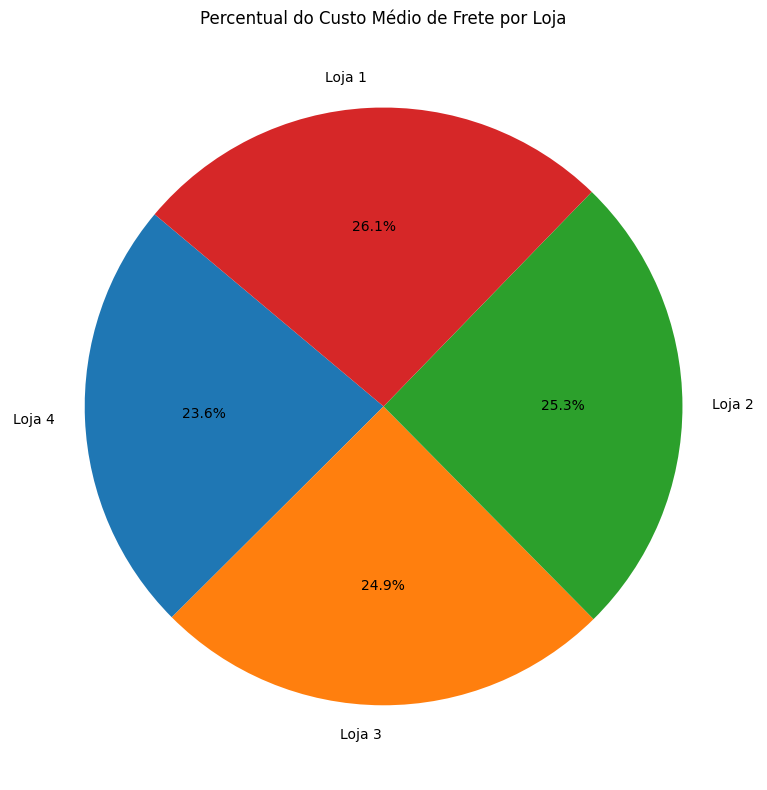

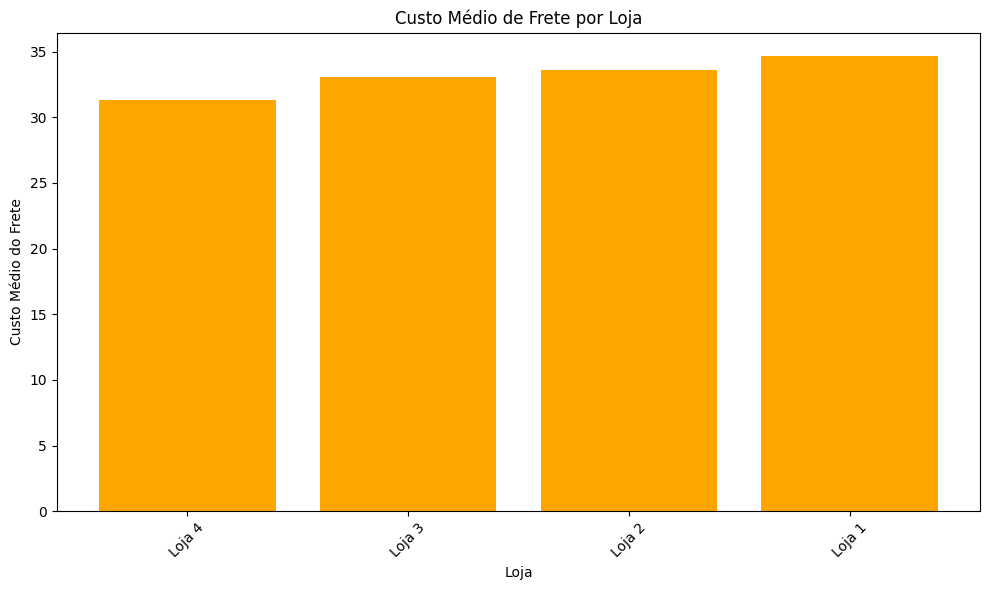

In [58]:
custo_medio_frete_por_loja()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

def gerar_faturamento_liquido(lojas):
  """
  Recebe um DataFrame 'lojas' e:
  1. Calcula o faturamento líquido (somatório da coluna Preço por loja).
  2. Retorna um DataFrame com o faturamento líquido.
  3. Gera gráficos de barra e pizza.
  """
  # Agrupa por loja e soma os preços
  faturamento_liquido = lojas.groupby('Loja')['Preço'].sum().reset_index()
  faturamento_liquido.columns = ['Loja', 'FaturamentoLiquido']

  # Gráfico de barras
  plt.figure(figsize=(8, 5))
  plt.bar(faturamento_liquido['Loja'], faturamento_liquido['FaturamentoLiquido'], color='skyblue')
  plt.title('Faturamento Líquido por Loja')
  plt.xlabel('Loja')
  plt.ylabel('Faturamento Líquido (R$)')
  plt.tight_layout()
  plt.show()

  # Gráfico de pizza
  plt.figure(figsize=(6, 6))
  plt.pie(faturamento_liquido['FaturamentoLiquido'], labels=faturamento_liquido['Loja'], autopct='%1.1f%%')
  plt.title('Faturamento Líquido por Loja')
  plt.tight_layout()
  plt.show()

  return faturamento_liquido

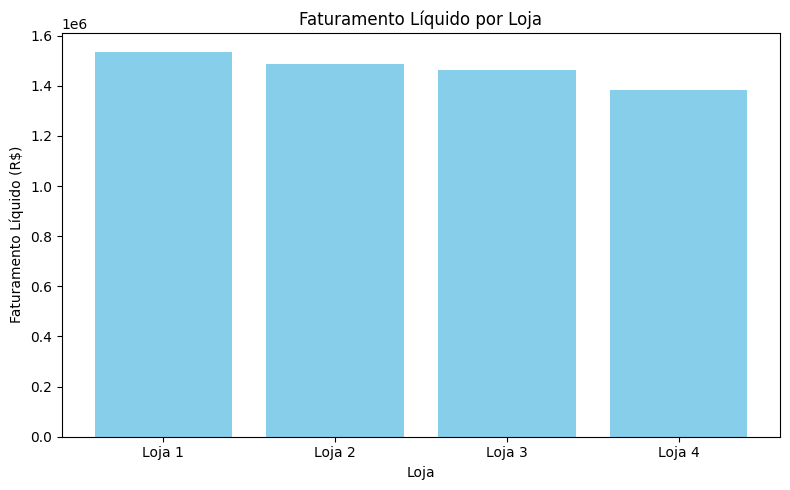

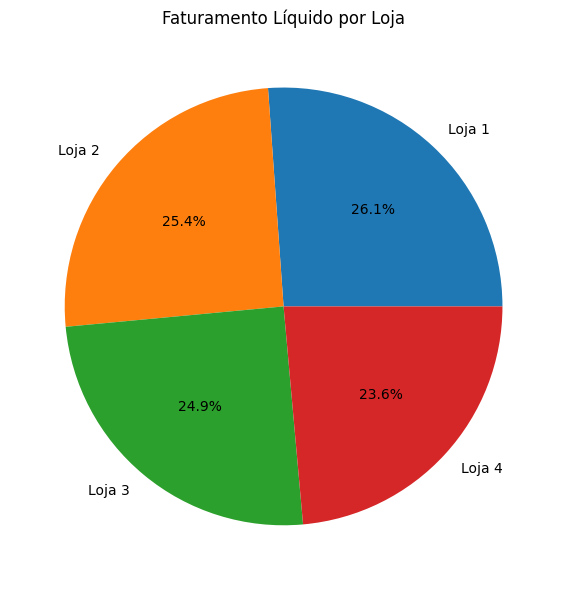

,Loja,FaturamentoLiquido
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


In [60]:
gerar_faturamento_liquido(lojas)

# 6. Conclusão
Foi-nos pedido uma análise sobre as lojas do Sr. João com o objetivo de aconselhá-lo a vender uma das lojas.

Fizemos algumas tratativas baseadas nas informações disponibilizadas das suas quatro lojas.

# Loja a vender
Pelo menor faturamento, tanto bruto (preço + frete), quanto no faturamento líquido (preço), a loja a ser *fechada* é **Loja 4**. Abaixo imagens do faturamento.

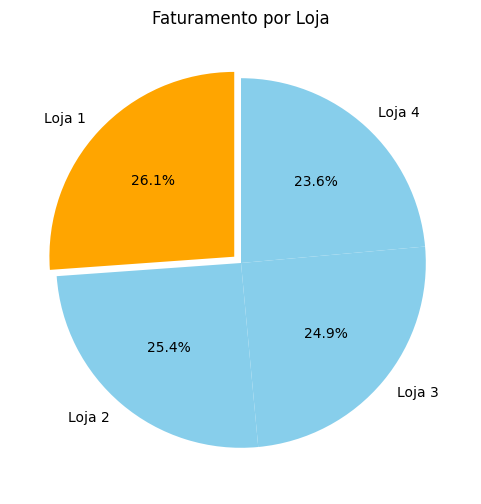


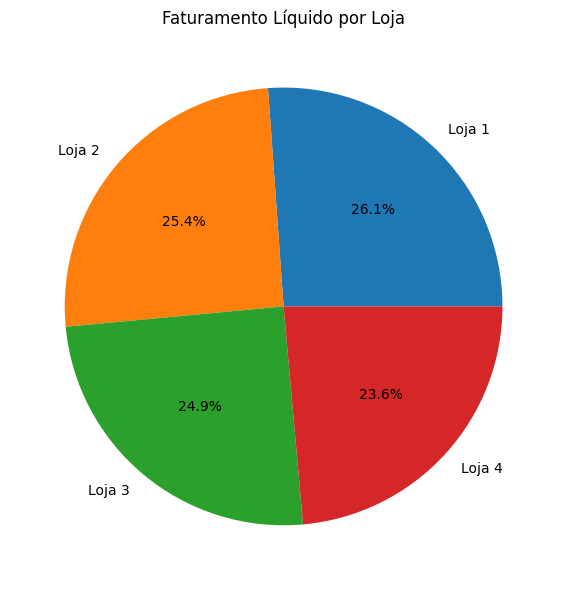



A loja 4 tem o segundo pior nível de atendimento. Mais um ponto contra a loja 4.
A loja 1 tem o melhor faturamento, embora necessite melhorar o nível de atendimento pois é a pior em avaliação.

Diferentemente daquelas, as lojas 3 e 2, são as mais bem conceituadas em termos de avaliação.

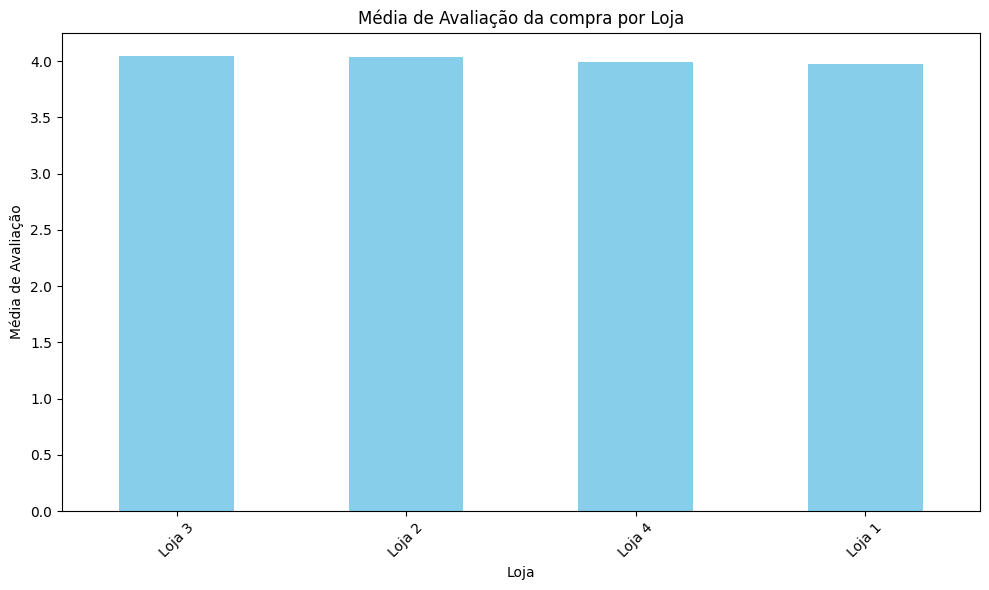

Médias de avalição:

Loja 3  -  4.048326

Loja 2  -  4.037304

Loja 4  -  3.995759

Loja 1  -  3.976685


Em todas as lojas, as categorias as três categorias mais vendidas são, na ordem do maior para a menor, são: móveis, eletrônicos, brinquedos.  

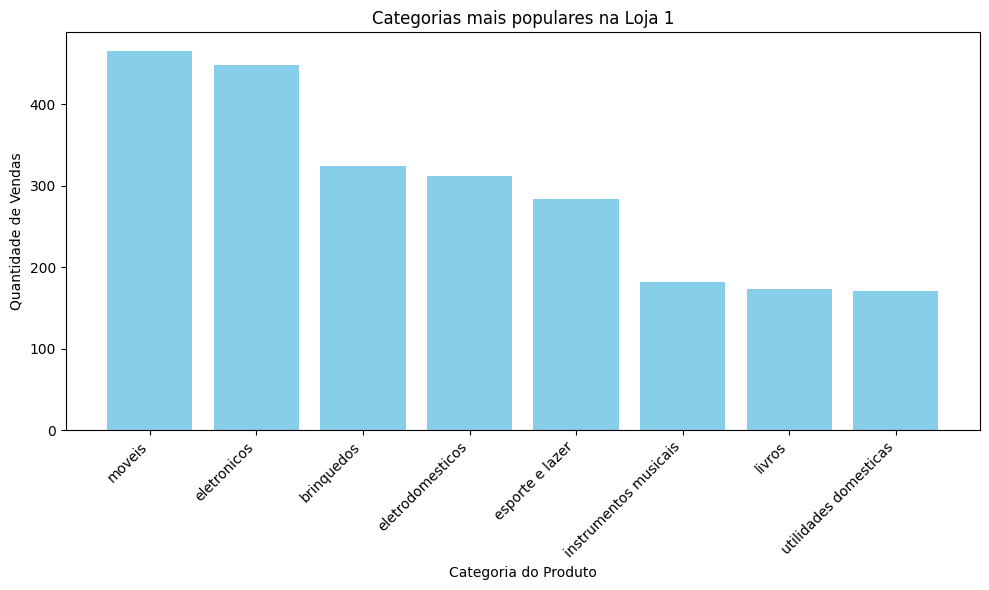


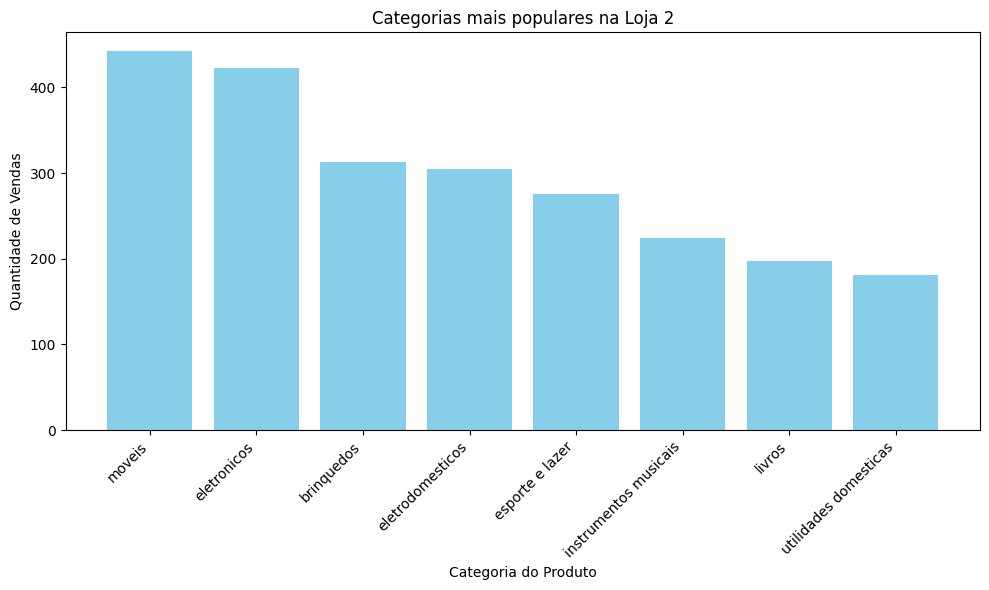

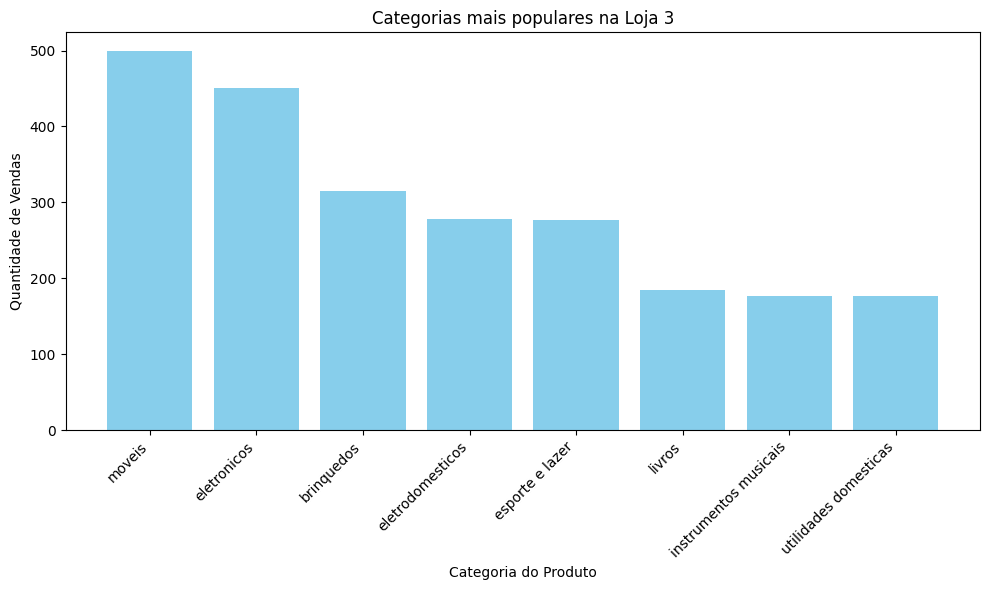

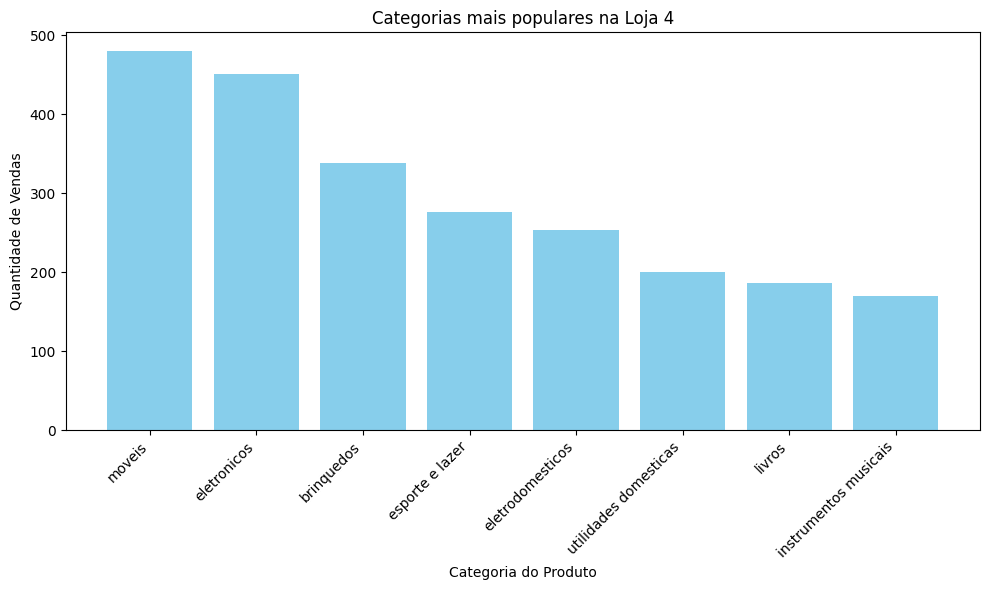

A loja com maior contabilização de frete é a Loja 1, de outro modo, a menor é a loja 4.

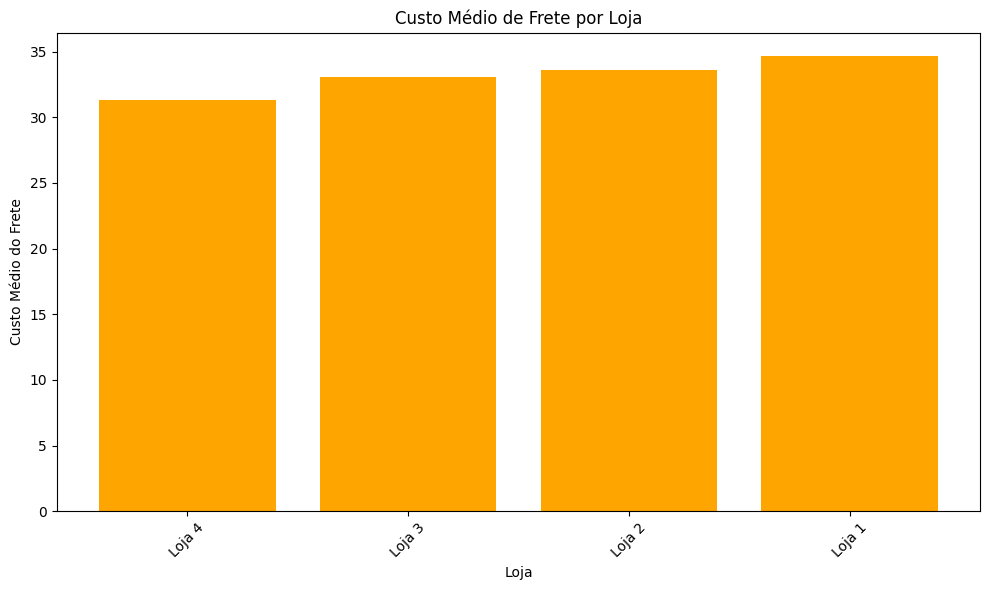